## Import Libraries and data 
df_falg - [42372x1]

df_cons - [42372x1034]

In [1]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib as mpl 
import matplotlib.pyplot as plt
from tqdm import tqdm # Execution progress

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carregam el dataset i indicam la primera columna com index
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data.csv', index_col= 0)
df = df.T
print (df)

CONS_NO    0387DD8A07E07FDA6271170F86AD9151  01D6177B5D4FFE0CABA9EF17DAFC2B84  \
FLAG                                   1.00                               1.0   
2014/1/1                                NaN                               NaN   
2014/1/10                               NaN                               NaN   
2014/1/11                               NaN                               NaN   
2014/1/12                               NaN                               NaN   
...                                     ...                               ...   
2016/9/5                              18.05                               0.0   
2016/9/6                              26.47                               0.0   
2016/9/7                              18.75                               0.0   
2016/9/8                              17.84                               0.0   
2016/9/9                              14.92                               0.0   

CONS_NO    4B75AC4F2D8434CF

In [ ]:
# Separam el dataset en dos dataframes, un amb les dades de consum i l'altre amb els labels
# LABELS
#df_flag = df.T ['FLAG']
df_flag = df [:1]
print(df_flag)
# CONSUMOS
df_cons = df[1:]
print(df_cons)
df_cons.info()

CONS_NO  0387DD8A07E07FDA6271170F86AD9151  01D6177B5D4FFE0CABA9EF17DAFC2B84  \
FLAG                                  1.0                               1.0   

CONS_NO  4B75AC4F2D8434CFF62DB64D0BB43103  B32AC8CC6D5D805AC053557AB05F5343  \
FLAG                                  1.0                               1.0   

CONS_NO  EDFC78B07BA2908B3395C4EB2304665E  6BCFD78138BC72A9BA1BFB0B79382192  \
FLAG                                  1.0                               1.0   

CONS_NO  34C1954AA3703C4F8BD8EAEA7C4B7B83  768309B0EB11FD436CEE5ABFB84F4C0C  \
FLAG                                  1.0                               1.0   

CONS_NO  D0A186208CE83FBCCF730857C9A75B6F  516954F5FF177CE314656D727FCC66A5  \
FLAG                                  1.0                               1.0   

CONS_NO  ...  1C6A4E84B6CE1105A01EECC4955FE4AC  \
FLAG     ...                               0.0   

CONS_NO  9B3DC5E19AC7BE97FBE1A65F4A115CC4  1DF750822A991C356E86556CF5A64955  \
FLAG                     

In [ ]:
 # Guardem el dataset de labels
df_flag.to_csv(r'/content/drive/MyDrive/Colab Notebooks/data/data_flag.csv')

## EDA (Exploratory Data Analysis)

In [ ]:
# Null data
per_null = df_cons.isnull().sum().div(1034)
#print(type(per_null))
per_null = per_null.to_frame()
#print(type(per_null))
per_null.columns = ['Perc']
# print (per_null)

#per_null_aux = per_null[per_null.Perc.apply(lambda pct: 0.1 < pct and pct < 0.2)]
per_null_10 = per_null[per_null.Perc.apply(lambda pct: pct <= 0.1)]
print(len (per_null_10)/len (per_null))
per_null_20 = per_null[per_null.Perc.apply(lambda pct: 0.1 < pct and pct <= 0.2)]
per_null_30 = per_null[per_null.Perc.apply(lambda pct: 0.2 < pct and pct <= 0.3)]
per_null_40 = per_null[per_null.Perc.apply(lambda pct: 0.3 < pct and pct <= 0.4)]
per_null_50 = per_null[per_null.Perc.apply(lambda pct: 0.4 < pct and pct <= 0.5)]
per_null_60 = per_null[per_null.Perc.apply(lambda pct: 0.5 < pct and pct <= 0.6)]
per_null_70 = per_null[per_null.Perc.apply(lambda pct: 0.6 < pct and pct <= 0.7)]
per_null_80 = per_null[per_null.Perc.apply(lambda pct: 0.7 < pct and pct <= 0.8)]
per_null_90 = per_null[per_null.Perc.apply(lambda pct: 0.8 < pct and pct <= 0.9)]
per_null_100 = per_null[per_null.Perc.apply(lambda pct: 0.9 < pct and pct <= 1)]

0.4955395072217502


Text(0, 0.5, '# Consumidores')

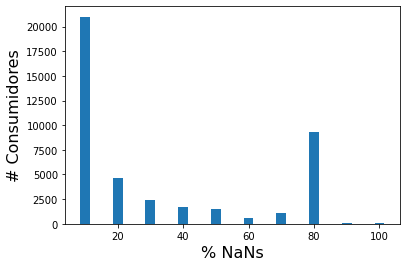

In [ ]:
# Bar graphic %nulls / #Cons
per = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
cons_per = [len(per_null_10), len(per_null_20), len(per_null_30), len(per_null_40), len(per_null_50), len(per_null_60), len(per_null_70), len(per_null_80), len(per_null_90), len(per_null_100)]
mpl.pyplot.bar(per, cons_per, width = 3)
plt.xlabel("% NaNs", size = 16,)
plt.ylabel("# Consumidores", size = 16)

CONS_NO    589EEA437003516D93A98393FB183B81
2014/1/1                               8.67
2014/1/10                             10.89
2014/1/11                             11.01
2014/1/12                             11.39
2014/1/13                             10.33
...                                     ...
2016/9/5                              13.85
2016/9/6                               9.19
2016/9/7                              11.61
2016/9/8                              12.95
2016/9/9                              11.85

[1034 rows x 1 columns]


Text(0, 0.5, 'Consumo')

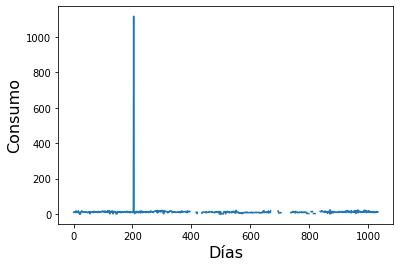

In [ ]:
cons = per_null_20.sample()
i = cons.index
# print (i)
# print (df_cons[i])
# print (np.asarray(df_cons[i]))
print(df_cons[i])
plt.plot(np.asarray(df_cons[i]))
plt.xlabel("Días", size = 16,)
plt.ylabel("Consumo", size = 16)

## Partició de dataset depenent de # NaNs

In [ ]:
# Començam tractant sols els consumidos amb menys d'un 20% de NaNs 
aux = per_null_10+per_null_20
df_cons_20 = df_cons[aux.index]
df_flag_20 = df_flag[aux.index]
print (df_cons_20, df_flag_20)

## Ordenem les dates

In [ ]:
# Ordenem les dates
df_cons['date'] = df_cons.index
df_cons['date'] = pd.to_datetime(df_cons['date'])
df_cons.sort_values(by='date', inplace=True)
df_cons.set_index('date', inplace=True)

In [ ]:
df_cons

## NaNs cleaning
NO EXECUTAR

In [ ]:
# NaN clarning
# Creem funció per recorre consumidors
def func_apply(col):  
  def f(row):
    if np.isnan(row.iloc[j]):
      if np.isnan(row.iloc[j+1]) or np.isnan(row.iloc[j-1]):
        return 0
      else:
          return (row.iloc[j+1]+row.iloc[j-1])/(2)
    else:
      return row.iloc[j]
  return f

In [ ]:
# Recorrem dates i executem funció anterior
cols = []
for j in tqdm(range(len(df_cons)-1),total = len(df_cons)):
  cols.append(df_cons.T.apply(func_apply(j), axis = 1))

In [ ]:
# Canviem el resultat a pd dataframe i afegim la columna de index
df_cons_2 = pd.DataFrame(cols)
df_cons_2

In [ ]:
# Afegim les dates al dataset netejat i les definim com index
aux = df_cons.index [1:]
aux
# aux = aux.drop(['2016/10/31'])
df_cons_2['date'] = aux
df_cons_2.set_index('date', inplace = True)

In [ ]:
# Importam dataset netejat a CSV
df_cons_2.to_csv(r'/content/drive/MyDrive/Colab Notebooks/data/clean_data.csv')

In [ ]:
# Exportam data set netejat
aux = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/clean_data.csv', index_col= 'date')

In [ ]:
aux

## Outliers

In [ ]:
# Exportam data set netejat
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/clean_data.csv', index_col= 'date')

In [ ]:
len(df)

1033

In [ ]:
# Eliminem Outliers
# Creem funció per recorre consumidors
def func_apply(col):
  def f(row):
    if row.iloc[j] > row.mean() + 2*row.std():
      return row.mean() + 2*row.std()
    else:
      return row.iloc[j]
  return f

In [ ]:
# Recorrem dates i executem funció anterior
# 
cols = []
for j in tqdm(range(len(df)),total = len(df)):
  cols.append(df.T.apply(func_apply(j), axis = 1))

100%|██████████| 1033/1033 [1:12:43<00:00,  4.22s/it]


In [ ]:
# Cambiamos el resultado a pd dataframe y añadimos la columna de index
df_2 = pd.DataFrame(cols)
df_2

In [ ]:
# Tornem a afegir les dates al dataset netejat i fora outliers i les definim com index
aux = df_cons.index [1:]
aux
# aux = aux.drop(['2016/10/31'])
df_2['date'] = aux
df_2.set_index('date', inplace = True)
df_2.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

In [ ]:
# Guardam resultat en nou dataset (CSV)
df_2.to_csv(r'/content/drive/MyDrive/Colab Notebooks/data/data_v1.csv')

In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data_v1.csv', index_col = 'date')

## Sort datasets

In [ ]:
# Data loading via dive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data_v1.csv', index_col = 'date')
df = df.T

df_flag = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data_flag.csv', index_col = 0)
df_flag = df_flag.T

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ordenamos data frame de label y consumos con el mimso orden 
df_flag['Consumidor'] = df_flag.index
df_flag.sort_values('Consumidor')
df_flag.drop(['Consumidor'], axis=1, inplace = True)

In [ ]:
df['Consumidor'] = df.index
df.sort_values('Consumidor')
df.drop(['Consumidor'], axis=1, inplace = True)

In [ ]:
# Guardam resultat en nou dataset (CSV)
df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/data/data_v2.csv')

In [ ]:
 # Guardem el dataset de labels
df_flag.to_csv(r'/content/drive/MyDrive/Colab Notebooks/data/data_flag_v2.csv')

## Auxiliar

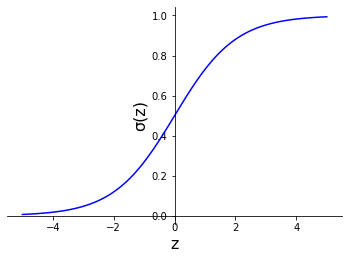

In [ ]:
# Representación sigma
import matplotlib.pyplot as plt
import numpy as np
import math

# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function
y = 1/(1+math.exp(1)**-x)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel("z", size = 16,)
plt.ylabel("σ(z)", size = 16)

# plot the function
plt.plot(x,y, 'b')

# show the plot
plt.show()

In [ ]:
x = np.linspace(-5,5,100)
c = 0

# the function, which is y = x^2 here
def relu(x):
    return(np.maximum(0, x))

y = relu(x)
print (y)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05050505 0.15151515 0.25252525 0.35353535
 0.45454545 0.55555556 0.65656566 0.75757576 0.85858586 0.95959596
 1.06060606 1.16161616 1.26262626 1.36363636 1.46464646 1.56565657
 1.66666667 1.76767677 1.86868687 1.96969697 2.07070707 2.17171717
 2.27272727 2.37373737 2.47474747 2.57575758 2.67676768 2.77777778
 2.87878788 2.97979798 3.08080808 3.18181818 3.28282828 3.38383838
 3.48484848 3.58585859 3.68686869 3.78787879 3.88888889 3.98989899
 4.09090909 4.19191919 4.29292929 4.39393939 4.49494949 4.5

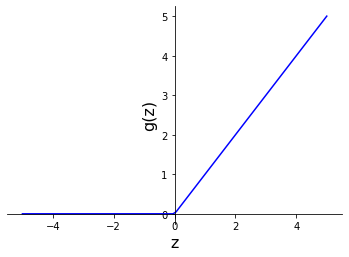

In [ ]:
# Representación ReLu
# Representación sigma
import matplotlib.pyplot as plt
import numpy as np
import math

# 100 linearly spaced numbers
x = np.linspace(-5,5,100)
c = 0
y = np.zeros(100)

# the function, which is y = x^2 here
def relu(x):
    return(np.maximum(0, x))

y = relu(x)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel("z", size = 16,)
plt.ylabel("g(z)", size = 16)

# plot the function
plt.plot(x,y, 'b')

# show the plot
plt.show()